<a href="https://colab.research.google.com/github/Exabyte-io/api-examples/blob/dev/other/jarvis/run_job_using_material_from_jarvis_db.ipynb" target="_parent">
<img alt="Open in Google Colab" src="https://user-images.githubusercontent.com/20477508/128780728-491fea90-9b23-495f-a091-11681150db37.jpeg" width="150" border="0">
</a>

## Install Packages
First, install `express-py` which includes `jarvis-tools` as dependency.

In [1]:
!pip install express-py==2024.1.25.post7

INFO: pip is looking at multiple versions of pymatgen to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of pymatgen to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 25.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.6/82.6 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 50.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 61.9 MB/s eta 0:00:00
   ━━━━━━━━━━━

In [3]:
pip install intermat

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 kB 1.7 MB/s eta 0:00:00


In [4]:
# pos_subs="""GaAs
# 1.0
# 3.509895098013499 -6.584084e-10 2.026439508259945
# 1.169965032050413 3.3091606691404545 2.026439508259945
# -1.8622597e-09 -1.3168164e-09 4.052878022970947
# Ga As
# 1 1
# Cartesian
# 0.0 0.0 0.0
# 1.1699675 0.82729 2.02644
# """

# pos_film="""Si2
# 1.0
# 3.3641499856336465 -2.5027128e-09 1.94229273881412
# 1.121382991333525 3.1717517190189715 1.9422927388141193
# -2.5909987e-09 -1.8321133e-09 3.884586486670313
# Si
# 2
# Cartesian
# 3.92483875 2.77528125 6.7980237500000005
# 0.56069125 0.39646875 0.9711462500000001
# """
# with open('pos_film','w') as f:
#   f.write(pos_film)

# with open('pos_subs','w') as f:
#   f.write(pos_subs)

# from jarvis.db.jsonutils import dumpjson,loadjson
# from jarvis.db.jsonutils import dumpjson
# import plotly.graph_objects as go

# config = {'calculator_method': 'ewald',
#  'disp_intvl': 0.1,
#  'film_file_path': 'pos_film',
#  'substrate_file_path': 'pos_subs',
#  'film_index': '1_1_0',
#  'substrate_index': '1_1_0'}

# dumpjson(data=config,filename='config_example2.json')
# !run_intermat.py --config_file config_example2.json >out2

# res=loadjson('intermat_results.json')

In [15]:
from jarvis.db.jsonutils import dumpjson,loadjson
from jarvis.db.jsonutils import dumpjson
import plotly.graph_objects as go

config = {'calculator_method': 'ewald',
 'disp_intvl': 0.1,
 'film_index': '0_0_1',
 'film_jid': 'JVASP-670',
 'substrate_index': '0_0_1',
 'dataset':'dft_2d',
 'substrate_jid': 'JVASP-664'}

dumpjson(data=config,filename='config_example2.json')
!run_intermat.py --config_file config_example2.json >out2

res=loadjson('intermat_results.json')

/usr/local/lib/python3.10/dist-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['number']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/intermat/generate.py:55: RuntimeWarning: divide by zero encountered in double_scalars
  strain_y = (
100% 100/100 [00:03<00:00, 25.66it/s]


(0.0, 9.0, 0.0, 9.0)

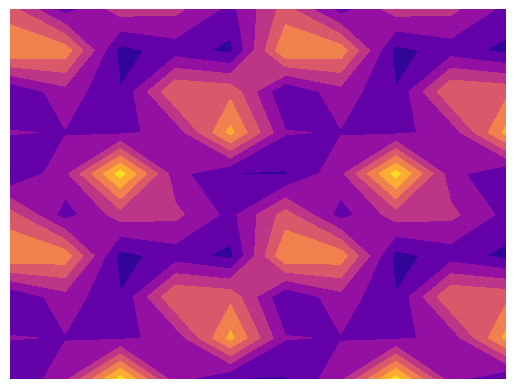

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.contourf(res['wads'],cmap='plasma')
plt.axis('off')


In [17]:
res.keys()

dict_keys(['systems', 'time_taken', 'wads'])

In [18]:
from jarvis.core.atoms import Atoms
atoms=Atoms.from_dict(res['systems'])
print(atoms)

System
1.0
3.18796 5.52171 -0.0
6.37591 -0.0 -0.0
-0.0 -0.0 -13.257305101620515
Mo S Te 
7 8 6 
direct
-0.07222168858380806 0.494444157057984 0.6900402511350963 bottom
0.11111017016386371 0.3333340338057745 0.2466129984865384 top
-0.22222316316946963 7.004724414460908e-07 0.2466129984865384 top
-0.5555564965028031 -0.33333263286089165 0.2466129984865384 top
-0.07222168858380806 -0.005555842942016054 0.6900402511350963 bottom
-0.5722216885838081 -0.005555842942015943 0.6900402511350963 bottom
-0.5722216885838081 0.494444157057984 0.6900402511350963 bottom
0.261110844291904 -0.172222078528992 0.5718700367088436 bottom
-0.2388891557080959 -0.672222078528992 0.80821046556135 bottom
-0.2388891557080959 -0.17222207852899196 0.80821046556135 bottom
0.261110844291904 -0.172222078528992 0.80821046556135 bottom
-0.2388891557080959 -0.672222078528992 0.5718700367088436 bottom
-0.2388891557080959 -0.17222207852899196 0.5718700367088436 bottom
0.261110844291904 -0.672222078528992 0.5718700367088436

## Get Materials Data From JARVIS
Then, let"s get the dataset containing 2D materials from JARVIS and wrap it into a pandas dataframe.

In [19]:
import pandas as pd
from jarvis.db.figshare import data, get_jid_data

dft_2d = data("dft_2d")
df = pd.DataFrame(dft_2d)

Obtaining 2D dataset 1.1k ...
Reference:https://www.nature.com/articles/s41524-020-00440-1
Other versions:https://doi.org/10.6084/m9.figshare.6815705
Loading the zipfile...
Loading completed.


## Create a simple heterostructure

We use two material ids and place them one above another.

In [20]:
from jarvis.core.atoms import Atoms
from jarvis.analysis.interface.zur import make_interface

## Note: JVASP-670 is an entry for MoTe2
jid1 = "JVASP-670"
jid2 ="JVASP-664"

for i in dft_2d:
 if i["jid"] == jid1:
  atoms1 = Atoms.from_dict(i["atoms"])
for i in dft_2d:
 if i["jid"] == jid2:
  atoms2 = Atoms.from_dict(i["atoms"])

interface_atoms_dict = make_interface(film=atoms1, subs=atoms2)
heterostructure_atoms = interface_atoms_dict["interface"].center_around_origin()

print (jid1,jid2,atoms1.composition.reduced_formula,atoms2.composition.reduced_formula, heterostructure_atoms)

mismatch_u,mismatch_v -0.03226692878349979 -0.03226692878349979
JVASP-670 JVASP-664 Te2Mo MoS2 System
1.0
6.37593 -0.0 -0.0
3.18796 -5.52171 -0.0
-0.0 -0.0 -25.75734579378708
Mo S Te 
7 8 6 
direct
0.36111136029246144 0.02777693088071573 0.6061329711247329 bottom
0.5555559999999957 0.11111066666667094 0.3584887699946901 bottom
0.22222266666666238 -0.2222226666666623 0.3584887699946901 bottom
-0.11111066666667099 -0.5555559999999956 0.3584887699946901 bottom
0.36111136029246127 -0.4722230691192842 0.6061329711247329 bottom
-0.13888863970753865 -0.4722230691192842 0.6061329711247329 bottom
-0.1388886397075386 0.02777693088071573 0.6061329711247329 bottom
0.19444431985376934 0.36111153455964207 0.5453107527903425 bottom
-0.30555568014623086 -0.13888846544035782 0.6669565435968711 bottom
-0.30555568014623075 0.36111153455964207 0.6669565435968711 bottom
0.19444431985376934 0.36111153455964207 0.6669565435968711 bottom
-0.30555568014623086 -0.13888846544035782 0.5453107527903425 bottom
-0.3

## Extract the film and substrate

In [25]:
# Using the fractional coordinate Z level of 0.5 to separate top/bottom
# See also https://github.com/usnistgov/jarvis/issues/311
heterostructure_atoms_copy = Atoms.from_dict(heterostructure_atoms.to_dict())
indices_to_remove = []
for index, coord in enumerate(heterostructure_atoms_copy.coords):
    #print(coord, index)
    if coord[2] < 0.5:
        indices_to_remove.append(index)
for i, ind in enumerate(indices_to_remove):
    heterostructure_atoms_copy = heterostructure_atoms_copy.remove_site_by_index(ind - i)
    #print("removed", ind, heterostructure_atoms_copy.props)
substrate_atoms = Atoms.from_dict(heterostructure_atoms_copy.to_dict())

heterostructure_atoms_copy = Atoms.from_dict(heterostructure_atoms.to_dict())
indices_to_remove = []
for index, coord in enumerate(heterostructure_atoms_copy.coords):
    #print(coord, index)
    if coord[2] > 0.5:
        indices_to_remove.append(index)
for i, ind in enumerate(indices_to_remove):
    heterostructure_atoms_copy = heterostructure_atoms_copy.remove_site_by_index(ind - i)
    #print("removed", ind, heterostructure_atoms_copy.props)
film_atoms = Atoms.from_dict(heterostructure_atoms_copy.to_dict())

## Extract Structure and Convert to ESSE
Next, we extract an entry from the JARVIS dataset and convert it into ESSE format ready to be uploaded to Mat3ra.com.

In [26]:
import json
from express import ExPrESS

def jarvis_atoms_to_esse(atoms):
    # JARVIS Atoms return poscar as representation
    # https://github.com/usnistgov/jarvis/blob/master/jarvis/core/atoms.py#L1333
    poscar = atoms.__repr__()
    kwargs = {
        "structure_string": poscar,
        "cell_type": "original",
        "structure_format": "poscar"
    }
    handler = ExPrESS("structure", **kwargs)
    material = handler.property("material", **kwargs)
    return material

material_film = jarvis_atoms_to_esse(film_atoms)
material_substrate = jarvis_atoms_to_esse(substrate_atoms)
material_heterostructure = jarvis_atoms_to_esse(heterostructure_atoms)

# To preview resulting JSON data
print(json.dumps(material_heterostructure, indent=4))

{
    "_id": "",
    "name": "material",
    "exabyteId": "",
    "hash": "",
    "formula": "Te6Mo7S8",
    "unitCellFormula": "Te6 Mo7 S8",
    "lattice": {
        "type": "HEX",
        "a": 6.37593,
        "b": 6.375921132330606,
        "c": 25.75734579378708,
        "alpha": 90.0,
        "beta": 90.0,
        "gamma": 60.000005874789395,
        "units": {
            "length": "angstrom",
            "angle": "degree"
        }
    },
    "basis": {
        "units": "crystal",
        "elements": [
            {
                "id": 1,
                "value": "Mo"
            },
            {
                "id": 2,
                "value": "Mo"
            },
            {
                "id": 3,
                "value": "Mo"
            },
            {
                "id": 4,
                "value": "Mo"
            },
            {
                "id": 5,
                "value": "Mo"
            },
            {
                "id": 6,
                "value": "

## Setup the API credentials
Finally, we can upload the material to Mat3ra.com using the REST API: follow the explanation in another example notebook [here](../../examples/material/create_material.ipynb). One can replace the content of the `CONFIG` variable with the JSON data above.

In [27]:
# @title Authorization Form
ACCOUNT_ID = ""  # @param {type:"string"}
AUTH_TOKEN = ""  # @param {type:"string"}
MATERIALS_PROJECT_API_KEY = "MATERIALS_PROJECT_API_KEY"  # @param {type:"string"}
ORGANIZATION_ID = ""


import os

if "COLAB_JUPYTER_IP" in os.environ:
    os.environ.update(
        dict(
            ACCOUNT_ID=ACCOUNT_ID,
            AUTH_TOKEN=AUTH_TOKEN,
            MATERIALS_PROJECT_API_KEY=MATERIALS_PROJECT_API_KEY,
            ORGANIZATION_ID=ORGANIZATION_ID,
        )
    )

    !GIT_BRANCH="dev"; export GIT_BRANCH; curl -s "https://raw.githubusercontent.com/Exabyte-io/api-examples/${GIT_BRANCH}/scripts/env.sh" | bash

Traceback (most recent call last):
  File "/usr/local/bin/notebook-path", line 8, in <module>
    sys.exit(print_notebook_path())
  File "/usr/local/lib/python3.10/dist-packages/utils/notebook.py", line 46, in print_notebook_path
    print(get_notebook_info()["notebook_path"])
  File "/usr/local/lib/python3.10/dist-packages/utils/notebook.py", line 22, in get_notebook_info
    parsed = re.findall("(.*)/blob/(.*)/examples/(.*)", path)[0]
IndexError: list index out of range


## Initialize the API Endpoints

In [28]:
from utils.settings import ENDPOINT_ARGS, ACCOUNT_ID
from utils.generic import wait_for_jobs_to_finish, get_property_by_subworkflow_and_unit_indicies, dataframe_to_html, display_JSON

# Relevant functions from the API client
from exabyte_api_client.endpoints.jobs import JobEndpoints
from exabyte_api_client.endpoints.projects import ProjectEndpoints
from exabyte_api_client.endpoints.materials import MaterialEndpoints
from exabyte_api_client.endpoints.bank_workflows import BankWorkflowEndpoints
from exabyte_api_client.endpoints.properties import PropertiesEndpoints

job_endpoints = JobEndpoints(*ENDPOINT_ARGS)
project_endpoints = ProjectEndpoints(*ENDPOINT_ARGS)
material_endpoints = MaterialEndpoints(*ENDPOINT_ARGS)
property_endpoints = PropertiesEndpoints(*ENDPOINT_ARGS)
bank_workflow_endpoints = BankWorkflowEndpoints(*ENDPOINT_ARGS)

## Create Material in the platform

In [29]:
material_heterostructure["name"] = f"Heterostructure - {jid1} with {jid2}"
material_heterostructure_in_the_platform = material_endpoints.create(material_heterostructure)

material_film["name"] = f"Film - {jid1}"
material_film_in_the_platform = material_endpoints.create(material_film)

material_substrate["name"] = f"Substrate - {jid2}"
material_substrate_in_the_platform = material_endpoints.create(material_substrate)

InvalidHeader: Invalid leading whitespace, reserved character(s), or return character(s) in header value: '\xa07qzeKmx8jH8M73whg'

## Create a workflow if it does not exist yet

Here we utilize the id of the Valence Band bank workflow from "curators" account `kXJ9j9piJTddX9FHz` and import it if it does not exist in the account collection.

In [ ]:
BANK_ID = "kXJ9j9piJTddX9FHz"
workflow_in_the_platform = bank_workflow_endpoints.copy(BANK_ID, ACCOUNT_ID)

## Create and Run a Job

Create Job config

In [ ]:
PPN = "4"
QUEUE = "D"
NODES = "1"
TIME_LIMIT = "01:00:00"
# Using MSFT Azure cluster with a bit larger memory bandwidth in "D" queue
CLUSTER = "master-production-20160630-cluster-007.exabyte.io"

compute = job_endpoints.get_compute(CLUSTER, PPN, NODES, QUEUE, TIME_LIMIT)

config = {
    "owner": {"_id": ACCOUNT_ID},
    "_material": {
        "_id": material_heterostructure_in_the_platform["_id"]
    },
    "_materials": [
        {"_id": material_heterostructure_in_the_platform["_id"]},
        {"_id": material_substrate_in_the_platform["_id"]},
        {"_id": material_film_in_the_platform["_id"]},
    ],
    "workflow": {"_id": workflow_in_the_platform["_id"]},
    "name": f"Valence Band - {material_heterostructure['name']}",
    "compute": compute,
}

Then create a job

In [ ]:
job = job_endpoints.create(config)

then run it

In [ ]:
job_endpoints.submit(job["_id"])

and wait for it to finish

In [ ]:
from utils.generic import wait_for_jobs_to_finish, get_property_by_subworkflow_and_unit_indicies
job_id = job["_id"]
wait_for_jobs_to_finish(job_endpoints, [job_id])

Then get job files:

In [ ]:
files = job_endpoints.list_files(job_id)
paths = [file["key"] for file in files]
for path in paths:
    if "outdir" not in path:
        print(path)

for file in files:
    if file["name"] == "pw_scf.out":
        output_file_metadata = file

import urllib

server_response = urllib.request.urlopen(output_file_metadata["signedUrl"])
output_file = server_response.read().decode(encoding="UTF-8")

with open(output_file_metadata["name"], "w") as file_descriptor:
    file_descriptor.write(output_file)

and get job properties using the index of a subworkflow in workflow and the index of unit in subworkflow (0, 0) below

In [ ]:
pressure = get_property_by_subworkflow_and_unit_indicies(property_endpoints, "pressure", job, 0, 0)
print(pressure["data"]["value"])